In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Hierarchical imports
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# K-Means imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#PCA imports
from sklearn.decomposition import PCA

# Part 1: Clustering - Digital Ads

## Q1: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [2]:
ads_df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")
ads_df.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [3]:
ads_df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [4]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [5]:
ads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


### Segregating the categorical and numeric columns

In [6]:
ads_cat = ads_df.select_dtypes(include='object').columns
ads_num = ads_df.select_dtypes(exclude='object').columns

In [7]:
ads_cat

Index(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type',
       'Format'],
      dtype='object')

In [8]:
ads_num

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

### Levels of Categorical variables

In [9]:
for i in ads_cat:
    print("{}:\n\n{}\n\n".format(i,ads_df[i].value_counts().sort_index()))

Timestamp:

2020-10-1-0     12
2020-10-1-1     11
2020-10-1-10    12
2020-10-1-11    11
2020-10-1-12    11
                ..
2020-9-9-5      11
2020-9-9-6      11
2020-9-9-7      11
2020-9-9-8      11
2020-9-9-9      11
Name: Timestamp, Length: 2018, dtype: int64


InventoryType:

Format1    3814
Format2    1789
Format3    3540
Format4    7165
Format5    4249
Format6    1850
Format7     659
Name: InventoryType, dtype: int64


Ad Type:

Inter217    1655
Inter218    1645
Inter219    1650
Inter220    1644
Inter221    1650
Inter222    1649
Inter223    1654
Inter224    1658
Inter225    1643
Inter226    1640
Inter227    1647
Inter228    1639
Inter229    1648
inter230    1644
Name: Ad Type, dtype: int64


Platform:

App      4942
Video    9873
Web      8251
Name: Platform, dtype: int64


Device Type:

Desktop     8260
Mobile     14806
Name: Device Type, dtype: int64


Format:

Display    11514
Video      11552
Name: Format, dtype: int64




## Q2: Treat missing values in CPC, CTR and CPM using the formula given.

### Data Pre-Processing
### Duplicate values

In [10]:
ads_df[ads_df.duplicated()]

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC


### There are no dulicate values present in the dataset.

### Null values

In [11]:
ads_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

### It can be observed that the columns CTR, CPM and CPC consists of several null values. They can be calculated by the provided formulae:

In [12]:
ads_df.CTR = round(((ads_df.Clicks/ads_df.Impressions)*100),2)
ads_df.CPM = round(((ads_df.Spend/ads_df.Impressions)*1000),4)
ads_df.CPC = round((ads_df.Spend/ads_df.Clicks),4)

In [13]:
ads_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### The null values in the dataset have been treated.

## Q3:  Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ.

### Outliers and their treatment

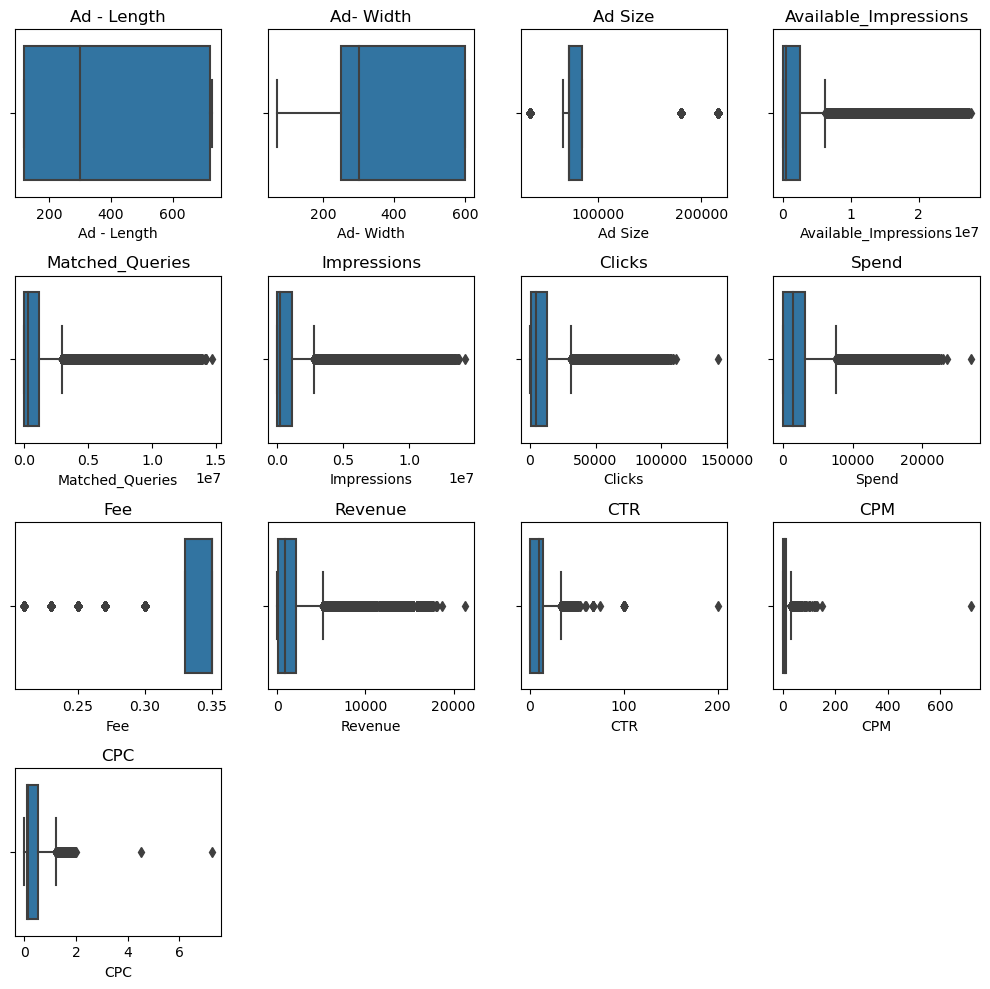

In [14]:
#Visualizing outliers using boxplots
def BoxPlot():
    col = len(ads_num)
    plt.figure(figsize=(10,10))
    for i in range(0,col):
        plt.subplot(4,4,i+1)
        plt.title("{}".format(ads_num[i]))
        sns.boxplot(x = ads_df[ads_num[i]])
        plt.tight_layout()
BoxPlot()

### It can be observed that there are various outliers in the columns. K-Means clustering is sensitive to outliers as they can significantly affect the centroids and hence distort the clusters. Outliers tend to pull the cluster centers towards them which causes the clusters to be improperly defined. Hence it becomes important for us to treat such outliers before proceeding with K-Means clustering.

In [15]:
#Calculating the outliers using the IQR method
num = ads_df.select_dtypes(exclude='object')
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3-Q1
upper = 1.5*IQR + Q3
lower = 1.5*IQR - Q1

#Total number of upper and lower outliers in each category
print("IQR Method:\n\n{}".format(((num < lower) | (num > upper)).sum()))

IQR Method:

Ad - Length              23066
Ad- Width                10993
Ad Size                   4908
Available_Impressions    21274
Matched_Queries          22000
Impressions              22054
Clicks                   20313
Spend                    20914
Fee                          0
Revenue                  21169
CTR                      21279
CPM                      19619
CPC                      18539
dtype: int64


In [16]:
#Calculating the outliers using the Min/Max method
lower_1 = num.quantile(0.05)
upper_1 = num.quantile(0.95)

#Total number of upper and lower outliers in each category
print("Min/MAx Method:\n\n{}".format(((num < lower_1) | (num > upper_1)).sum()))

Min/MAx Method:

Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions    2308
Matched_Queries          2308
Impressions              2308
Clicks                   2299
Spend                    2305
Fee                       914
Revenue                  2305
CTR                      2059
CPM                      2307
CPC                      2306
dtype: int64


### It can be observed that the number of outliers is comparatively higher when employing the IQR method over the Min/Max method for the outlier calculation. Treating a greater number of outliers also results into decreasing the data variability which might not produce accurate results. Hence we would be treating the outliers using the Min/Max method:

In [17]:
def OutlierTreatment():
    for i in num:
        num[i] = np.where(num[i]>upper_1[i],upper_1[i],num[i])
        num[i] = np.where(num[i]<lower_1[i],lower_1[i],num[i])
OutlierTreatment()

In [18]:
((num < lower_1) | (num > upper_1)).sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [19]:
#Replacing the numeric columns of the original dataframe with the treated columns
ads_df[ads_num] = num

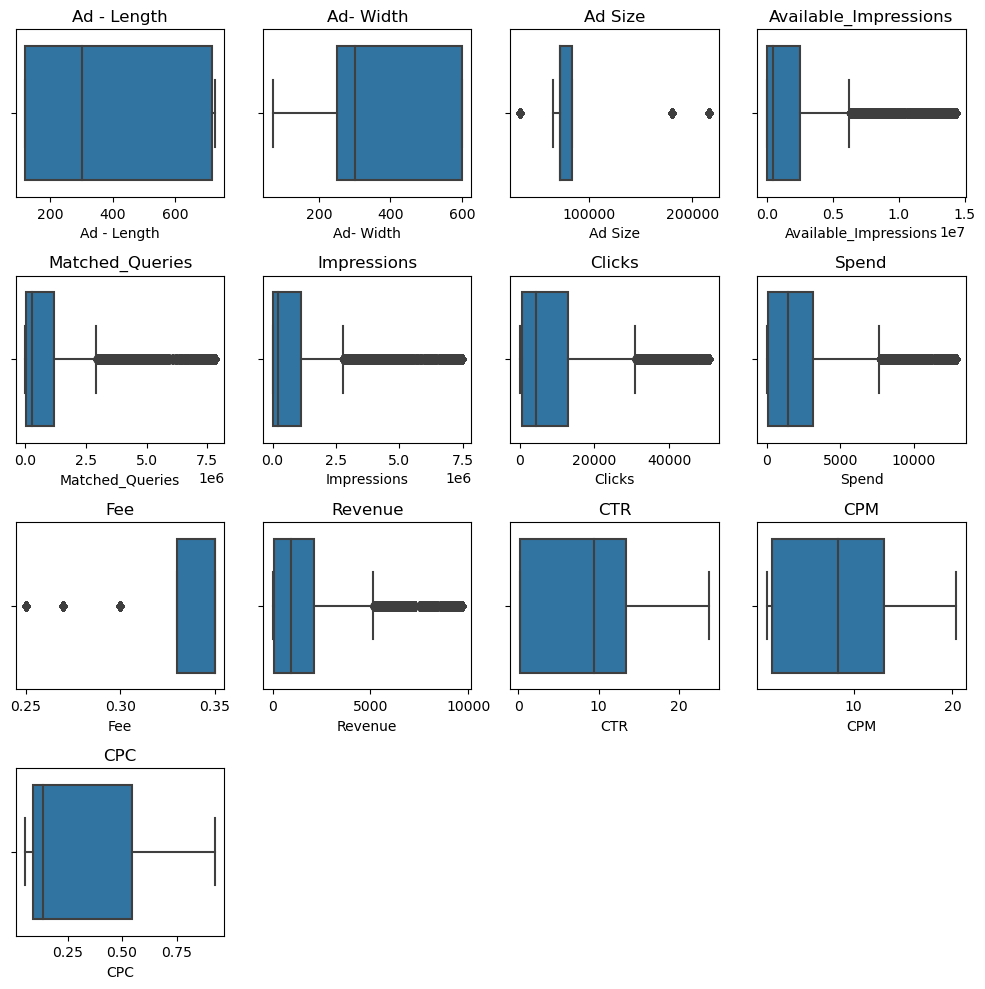

In [20]:
BoxPlot()

In [21]:
ads_df[(ads_df[ads_num]>upper_1) | (ads_df[ads_num]<lower_1)].count()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### It can be observed from the boxplots that the outliers have now been treated for the numeric variables.

## Q4: Perform z-score scaling and discuss how it affects the speed of the algorithm.

### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(ads_df[ads_num]) #Scaling done for only the numeric columns

ads_df_scaled = pd.DataFrame(scaled_df)
ads_df_scaled.columns = ads_num
ads_df_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.352218,-0.592761,-0.586089,-0.580978,-0.737121,-0.754487,0.481794,-0.712603,-0.999459,-1.067314,-0.908544
1,-0.364496,-0.432797,-0.352218,-0.592768,-0.586109,-0.580998,-0.737121,-0.754487,0.481794,-0.712603,-0.994253,-1.067314,-0.908544
2,-0.364496,-0.432797,-0.352218,-0.592505,-0.586073,-0.580961,-0.737121,-0.754487,0.481794,-0.712603,-1.003363,-1.067314,-0.908544
3,-0.364496,-0.432797,-0.352218,-0.592587,-0.586001,-0.580887,-0.737121,-0.754487,0.481794,-0.712603,-1.013774,-1.067314,-0.908544
4,-0.364496,-0.432797,-0.352218,-0.592925,-0.586131,-0.581021,-0.737121,-0.754487,0.481794,-0.712603,-0.986445,-1.067314,-0.908544


In [23]:
ads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.131361e+06,3.592680e+06,486.2500,33672.250000,483771.00000,2.527712e+06,1.436391e+07
Matched_Queries,23066.0,1.147036e+06,1.956591e+06,160.2500,18282.500000,258087.50000,1.180700e+06,7.803449e+06
Impressions,23066.0,1.096652e+06,1.887081e+06,149.2500,7990.500000,225290.00000,1.112428e+06,7.473380e+06
Clicks,23066.0,9.470898e+03,1.283114e+04,13.0000,710.000000,4425.00000,1.279375e+04,5.066200e+04
Spend,23066.0,2.490930e+03,3.300195e+03,1.0300,85.180000,1425.12500,3.121400e+03,1.289976e+04
Fee,23066.0,3.360561e-01,2.894228e-02,0.2500,0.330000,0.35000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.745232e+03,2.448207e+03,0.6695,55.365375,926.33500,2.091338e+03,9.674825e+03


In [24]:
ads_df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,2.464381e-17,1.000022,-1.024985,-0.400970,-0.400970,-0.205965,1.939086
Available_Impressions,23066.0,0.000000e+00,1.000022,-0.593128,-0.583891,-0.458606,0.110324,3.404928
Matched_Queries,23066.0,1.971505e-17,1.000022,-0.586173,-0.576910,-0.454345,0.017206,3.402121
Impressions,23066.0,-3.943010e-17,1.000022,-0.581070,-0.576915,-0.461761,0.008361,3.379223
Clicks,23066.0,3.943010e-17,1.000022,-0.737121,-0.682799,-0.393262,0.258973,3.210313
Spend,23066.0,0.000000e+00,1.000022,-0.754487,-0.728988,-0.322959,0.191044,3.154074
Fee,23066.0,0.000000e+00,1.000022,-2.973434,-0.209252,0.481794,0.481794,0.481794
Revenue,23066.0,-3.943010e-17,1.000022,-0.712603,-0.690262,-0.334496,0.141374,3.239009


### Scaling the data by converting it into its respective Z-scores helps in standardization and is an important aspect of data pre-processing. It ensures that each feature contributes equally to the distance calculation and hence helps in the smooth functioning of the algorithms. It can be observed from the summary of the data that prior to scaling, the data ranges were very varied however after it has been scaled, the data has become standardized with similar data ranges.

## Q5: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

### Hierarchical clustering

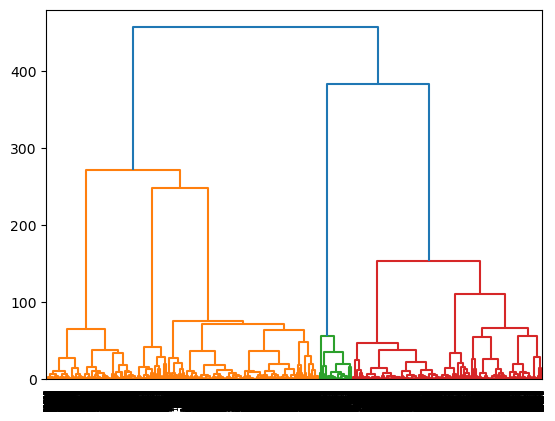

In [25]:
ward_link = linkage(scaled_df,method="ward",metric="euclidean")
dendro = dendrogram(ward_link)

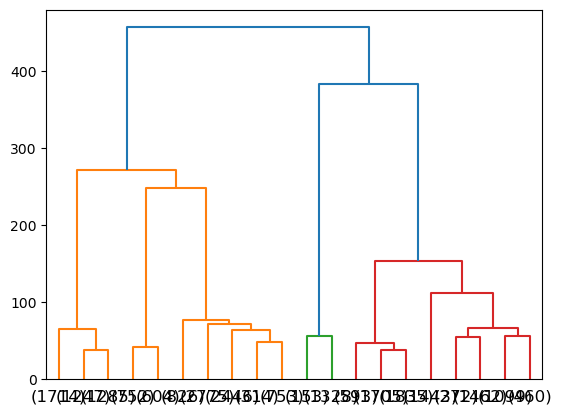

In [26]:
dendro = dendrogram(ward_link,p=20,truncate_mode='lastp')

### As per the dendrogram, it seems like the ideal number of clusters should be 3.

## Q6: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

### K-Means Clustering

In [27]:
k_means = KMeans(n_clusters=1)
k_means.fit_transform(scaled_df)
k_means.inertia_

299858.0

In [28]:
k_means = KMeans(n_clusters=5)
k_means.fit_transform(scaled_df)
k_means.inertia_

53909.498645533225

In [29]:
k_means = KMeans(n_clusters=6)
k_means.fit_transform(scaled_df)
k_means.inertia_

39529.363309497174

In [30]:
k_means = KMeans(n_clusters=7)
k_means.fit_transform(scaled_df)
k_means.inertia_

34666.73044359601

### Plotting the elbow plot and calculating the wss upto n=10

In [31]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit_transform(scaled_df)
    wss.append(k_means.inertia_)

In [32]:
wss

[299858.0,
 194477.84866036713,
 122049.29521213868,
 85239.74251567843,
 53909.498645533225,
 39529.34242716525,
 34666.752323257926,
 31299.73701605404,
 28656.580704613654,
 26240.27602594964]

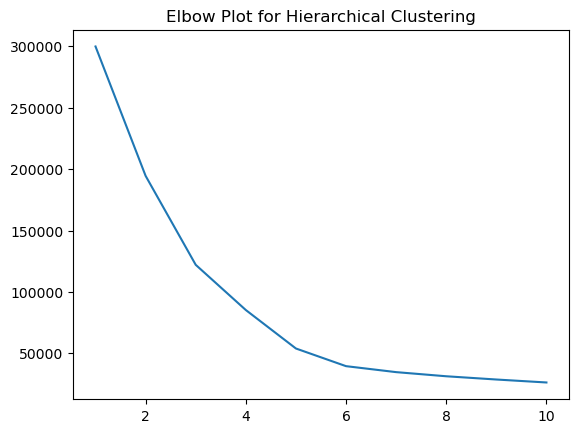

In [33]:
sns.lineplot(x=np.arange(1,11),y=wss)
plt.title("Elbow Plot for Hierarchical Clustering");

### As per the elbow plot and the WSS for different numbers of clusters, it seems like 5 clusters are ideal for the K-Means algorithm as the drop in the WSS values after n=5 isn't as steep as it was for the previous values of n.

## Q7: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

### Silhouette Scores

In [34]:
sil_scores = []
for i in range(2,11):
    k_means = KMeans(n_clusters=i,random_state=123)
    k_means.fit_transform(scaled_df)
    labels = k_means.labels_
    sil_scores.append(silhouette_score(scaled_df,labels))

In [35]:
for i in range(0,9):
    print("The silhouette score for {} clusters is: {}\n".format(i+2,round(sil_scores[i],3)))

The silhouette score for 2 clusters is: 0.438

The silhouette score for 3 clusters is: 0.423

The silhouette score for 4 clusters is: 0.504

The silhouette score for 5 clusters is: 0.567

The silhouette score for 6 clusters is: 0.553

The silhouette score for 7 clusters is: 0.543

The silhouette score for 8 clusters is: 0.465

The silhouette score for 9 clusters is: 0.472

The silhouette score for 10 clusters is: 0.429



### Similar to our previous conclusion derived from the elbow plot and WSS values, it can be said that 5 clusters are ideal for the K-Means algorithm as per the silhouette scores.

## Q8: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding.

### As per the conclusions drawn from the scree plot, WSS values and silhouette scores, we can proceed by creating 5 clusters for the dataset. We will input the value of n as 5 and thereafter assign the corresponding cluster labels to our original dataset:

In [36]:
k_means = KMeans(n_clusters=5,random_state=123)
k_means.fit_transform(scaled_df)
labels = k_means.labels_
ads_df["Labels"] = labels
ads_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Labels
0,2020-9-2-17,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,13.0,1.03,0.35,0.6695,0.31,1.1948,0.057,2
1,2020-9-2-10,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,13.0,1.03,0.35,0.6695,0.35,1.1948,0.057,2
2,2020-9-1-22,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,13.0,1.03,0.35,0.6695,0.28,1.1948,0.057,2
3,2020-9-3-20,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,13.0,1.03,0.35,0.6695,0.20,1.1948,0.057,2
4,2020-9-4-15,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,13.0,1.03,0.35,0.6695,0.41,1.1948,0.057,2


### Validating the efficiency of our clustering using the silhouette sample scores:

In [37]:
sil_width = silhouette_samples(scaled_df,labels)

#Adding a slihouette width column to the dataset
ads_df["Sil Width"] = sil_width

#Determining the count of negative silhouette width values
ads_df["Sil Width"][ads_df["Sil Width"]<0].count()

33

### A negative silhouette width indicates that an observation has been placed incorrectly in a cluster as it is closer to another cluster. A total of 33 silhouette width values out of approximately 23,000 data entries have negative values. This is a very negligible number which indicates that our observations have been correctly allocated within the clusters.

In [38]:
ads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.131361e+06,3.592680e+06,486.250000,33672.250000,483771.000000,2.527712e+06,1.436391e+07
Matched_Queries,23066.0,1.147036e+06,1.956591e+06,160.250000,18282.500000,258087.500000,1.180700e+06,7.803449e+06
Impressions,23066.0,1.096652e+06,1.887081e+06,149.250000,7990.500000,225290.000000,1.112428e+06,7.473380e+06
Clicks,23066.0,9.470898e+03,1.283114e+04,13.000000,710.000000,4425.000000,1.279375e+04,5.066200e+04
Spend,23066.0,2.490930e+03,3.300195e+03,1.030000,85.180000,1425.125000,3.121400e+03,1.289976e+04
Fee,23066.0,3.360561e-01,2.894228e-02,0.250000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.745232e+03,2.448207e+03,0.669500,55.365375,926.335000,2.091338e+03,9.674825e+03


In [39]:
ads_df.groupby(["Labels","Device Type"])[["Clicks","Spend","Revenue","CTR","CPM","CPC"]].mean().sort_index()

Clicks         Spend      Revenue        CTR  \
Labels Device Type                                                       
0      Desktop       3034.451703    319.759242   208.786298  15.097070   
       Mobile        3012.078847    322.920512   210.829459  15.011666   
1      Desktop      48191.440454   7155.030284  5142.420983  13.807940   
       Mobile       48611.863147   7194.976045  5175.004350  13.744386   
2      Desktop       4494.502694   2391.441509  1596.721939   0.361823   
       Mobile        4449.023667   2373.436745  1584.200203   0.358566   
3      Desktop      14299.704235   1222.293629   795.964808  13.047726   
       Mobile       14073.698874   1225.140211   797.974822  13.029274   
4      Desktop      17737.829670  12073.826007  9025.512097   0.193810   
       Mobile       17286.303245  12094.928418  9040.584755   0.193712   

                          CPM       CPC  
Labels Device Type                       
0      Desktop      13.854903  0.102866  
       Mobile       13.808814  0.102897  
1      Desktop      15.106322  0.110278  
       Mobile       14.986089  0.109987  
2      Desktop       1.751091  0.543614  
       Mobile        1.746788  0.548049  
3      Desktop      11.426928  0.089393  
       Mobile       11.532294  0.090523  
4      Desktop       1.679243  0.846946  
       Mobile        1.710691  0.852353

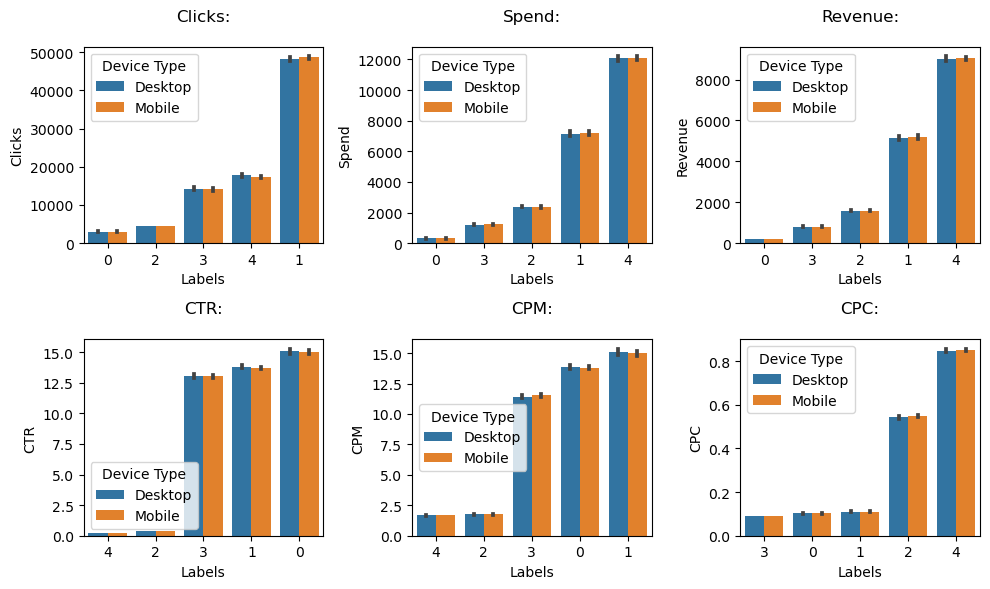

In [40]:
numeric = ads_df[["Clicks","Spend","Revenue","CTR","CPM","CPC"]].columns
col = len(numeric)
plt.figure(figsize=(10,6))
for i in range(0,col):    
    plt.subplot(2,3,i+1)
    sns.barplot(x=ads_df["Labels"],y=ads_df[numeric[i]],estimator="mean",hue=ads_df["Device Type"],order=ads_df.groupby("Labels")[numeric[i]].mean().sort_values().index)
    plt.title("{}:\n".format(numeric[i]))
    plt.tight_layout()

- <b>Cluster 0</b>: The ads category generating <b>average number of Clicks, Spend and Revenue values with low values of CTR, CPM and CPC for both desktop and mobile devices.</b>
- <b>Cluster 1</b>: The ads category generating the <b>lowest number of Clicks, Spend and Revenue values</b> however consisting of the <b>highest values of CTR and high values of CPM.</b>
- <b>Cluster 2</b>: The ads category generating <b>lowest values of CPC and average values for Spend,Revenue,Clicks and CPM.</b>
- <b>Cluster 3</b>: The ads category generating <b>highest Spend,Revenue and CPC values however consisting of lowest values of CTR and CPM.</b>
- <b>Cluster 4</b>: The ads category generating <b>highest values of Clicks,CTR and CPM and high values of Spend and Revenue</b>.

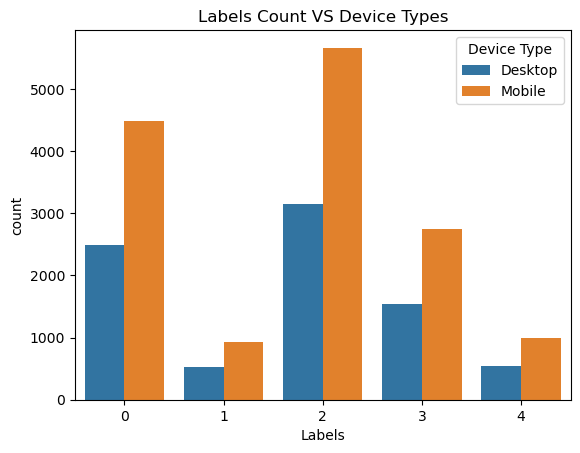

In [41]:
sns.countplot(x=ads_df["Labels"],hue=ads_df["Device Type"])
plt.title("Labels Count VS Device Types");

- <b>Mobiles dominate desktops</b> in all the categories
- The <b> ads category with the 0th label</b> has the <b> most count for both the devices </b>
- The <b>ads category with the 4th label</b> has the <b>least count for both the devices</b>

## Q9: Conclude the project by providing summary of your learnings.

### Summary

1. The ads pertaining to clusters 0 and 2 lie in the low to average range when compared to the rest of the clusters. They lie in the middle of almost all the metrics and the ad agency can device new strategies and planning to increase the promotion of such ads.
2. The ads pertaining to cluster 1 lie in the low yielding range with the lowest values for Clicks, Spend and Revenue. The CTR values are the highest for this cluster which means that despite of being viewed, the revenue generation for such ads is low. The ad agency can either undertake certain drastic measures to promote or upsell this category of ads to ensure greater revenue generation or it can replace it with more featuring ads.
3. The ads pertaining to cluster 3 are responsible for the most revenue generation along with the Spend and CPC costs. The CTR values however are the lowest for such ads and the ads agency can resort to new lucrative strategies in order to promote them.
4. The ads pertaining to cluster 4 have high values of Clicks, CTR and CPM. The revenue generation for such ads can be increased by investing more resources in such ad categories.

# Part 2: PCA - Census

## Q1 Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [42]:
census_df = pd.read_excel("PCA India Data_Census.xlsx")
census_df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [43]:
census_df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [44]:
census_df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [45]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

### Data Pre-Processing
### Null Values

### It can be observed from the data info that there are no null values in the dataset.

### Duplicate Values

In [46]:
census_df[census_df.duplicated()]

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F


### It can be observed that there are no duplicate values in the dataset.

## Q2: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

### Exploratory Data Analysis (EDA)

### 1. Which state has highest gender ratio and which has the lowest?

In [47]:
state_ratio_df = census_df.groupby("State")[["TOT_F","TOT_M"]].sum().sort_values(ascending=False,by="TOT_F")
state_ratio_df.head()

,TOT_F,TOT_M
State,,
Uttar Pradesh,12023885,9043969
Maharashtra,7138557,4196130
Andhra Pradesh,6097235,3274363
West Bengal,6016118,3912553
Tamil Nadu,5610310,3074009


### Calculating the sex ratio

In [48]:
state_ratio_df["Sex Ratio"] = (state_ratio_df["TOT_M"]/state_ratio_df["TOT_F"])*1000
state_ratio_df.sort_values(ascending=False,by="Sex Ratio").head()

,TOT_F,TOT_M,Sex Ratio
State,,,
Lakshadweep,14772,12823,868.061197
Haryana,1498873,1167816,779.129386
NCT of Delhi,1075266,833414,775.077051
Uttar Pradesh,12023885,9043969,752.166958
Meghalaya,356355,268036,752.160065


In [49]:
state_ratio_df.sort_values(ascending=False,by="Sex Ratio").tail()

,TOT_F,TOT_M,Sex Ratio
State,,,
Odisha,2536980,1460031,575.499610
Arunachal Pradesh,88066,50582,574.364681
Chhattisgarh,1526592,838404,549.199786
Tamil Nadu,5610310,3074009,547.921416
Andhra Pradesh,6097235,3274363,537.024241


### Lakshadweep has the highest sex ratio with 868 males for every 1000 females. 
### Andhra Pradesh has the lowest sex ratio with 537 males for every 1000 females.

### 2. Which district has the highest & lowest gender ratio?

In [50]:
district_ratio_df = census_df[["Area Name","TOT_M","TOT_F"]]
district_ratio_df.head()

,Area Name,TOT_M,TOT_F
0,Kupwara,23388,29796
1,Badgam,19585,23102
2,Leh(Ladakh),6546,10964
3,Kargil,2784,4206
4,Punch,20591,29981


In [51]:
district_ratio_df["Sex Ratio"] = (district_ratio_df["TOT_M"]/district_ratio_df["TOT_F"])*1000
district_ratio_df.sort_values(ascending=True,by="Sex Ratio").head()

,Area Name,TOT_M,TOT_F,Sex Ratio
546,Krishna,137603,314182,437.972258
397,Koraput,38026,86272,440.768731
624,Virudhunagar,66704,148445,449.351612
545,West Godavari,123111,273534,450.075676
390,Baudh,8672,19209,451.455047


In [52]:
district_ratio_df.sort_values(ascending=True,by="Sex Ratio").tail()

,Area Name,TOT_M,TOT_F,Sex Ratio
138,Baghpat,54807,64937,844.002649
105,Dhaulpur,31904,37671,846.911417
143,Mahamaya Nagar,67258,79378,847.312857
1,Badgam,19585,23102,847.762099
586,Lakshadweep,12823,14772,868.061197


### Lakshadweep has the highest sex ratio followed by the Bagdam district with 847 males for every 1000 females.
### The Krishna district has the lowest sex ratio with 437 males for every 1000 females.

### State-wise Highest and Lowest Populations

In [53]:
census_df.groupby("State")["TOT_M"].sum().sort_values(ascending=False).head(10)

State
Uttar Pradesh     9043969
Maharashtra       4196130
Bihar             4025198
West Bengal       3912553
Karnataka         3409482
Andhra Pradesh    3274363
Tamil Nadu        3074009
Kerala            2919825
Madhya Pradesh    2155608
Rajasthan         2062563
Name: TOT_M, dtype: int64

In [54]:
census_df.groupby("State")["TOT_M"].sum().sort_values(ascending=True).head(10)

State
Dadara & Nagar Havelli       6982
Lakshadweep                 12823
Daman & Diu                 13153
Andaman & Nicobar Island    18726
Sikkim                      26664
Chandigarh                  41753
Arunachal Pradesh           50582
Mizoram                     59534
Puducherry                  70386
Nagaland                    73506
Name: TOT_M, dtype: int64

In [55]:
census_df.groupby("State")["TOT_F"].sum().sort_values(ascending=False).head(10)

State
Uttar Pradesh     12023885
Maharashtra        7138557
Andhra Pradesh     6097235
West Bengal        6016118
Tamil Nadu         5610310
Bihar              5405883
Karnataka          5345675
Kerala             4856357
Madhya Pradesh     3369745
Rajasthan          2966496
Name: TOT_F, dtype: int64

In [56]:
census_df.groupby("State")["TOT_F"].sum().sort_values(ascending=True).head(10)

State
Dadara & Nagar Havelli       10831
Lakshadweep                  14772
Daman & Diu                  18706
Andaman & Nicobar Island     28691
Sikkim                       41518
Chandigarh                   59644
Arunachal Pradesh            88066
Mizoram                      95463
Puducherry                  119074
Nagaland                    125935
Name: TOT_F, dtype: int64

### Univariate Analysis

In [57]:
eda_df = census_df[["No_HH", "TOT_M", "TOT_F", "M_06", "F_06"]]
eda_df.head()

,No_HH,TOT_M,TOT_F,M_06,F_06
0,7707,23388,29796,5862,6196
1,6218,19585,23102,4482,3733
2,4452,6546,10964,1082,1018
3,1320,2784,4206,563,677
4,11654,20591,29981,5157,4587


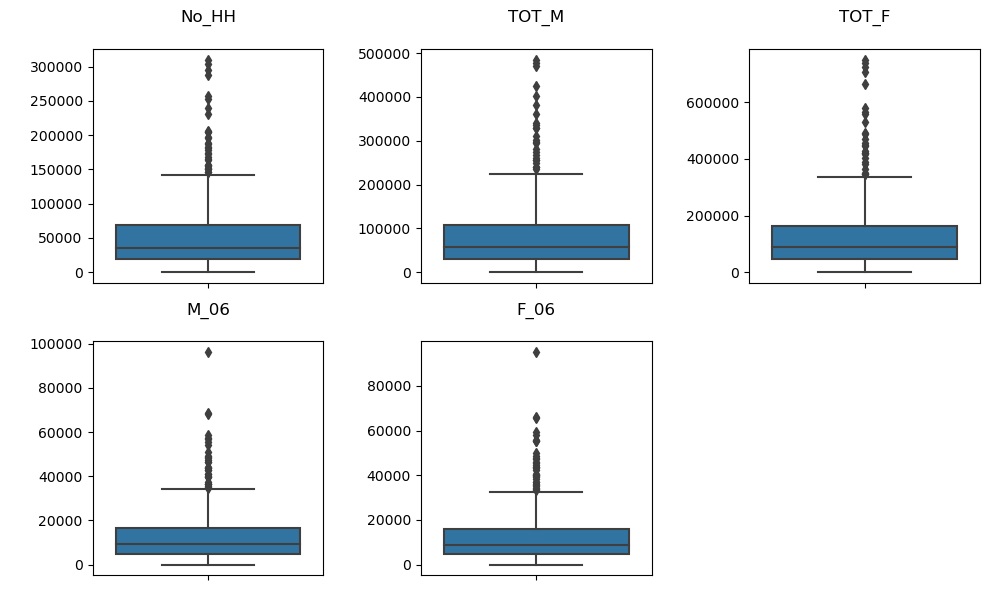

In [58]:
eda_num = eda_df.columns
def BoxPlot():
    cols = len(eda_num)
    plt.figure(figsize=(10,6))
    for i in range(0,cols):
        plt.subplot(2,3,i+1)
        plt.title("{}\n".format(eda_num[i]))
        sns.boxplot(y = eda_df[eda_num[i]])
        plt.tight_layout()
        plt.ylabel(ylabel=" ")
BoxPlot()

In [59]:
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


### Inferences

- There is a <b>total of 59 numeric fields</b> in the data

- The <b>average male population is 79940</b> while the <b>average female population is 122372</b>

- <b>Uttar Pradesh has the highest male and female population

- Dadara and Nagar Havelli has the lowest male and female population</b>

- The <b>male population ranges from 391 to 485417</b> while the <b>female population ranges from 640 to 750392</b>

- The <b>number of households ranges from 350 to 3,10,000</b>

- The <b>male population in the age group of 0-6 years lies between 640 to 96223</b>

- The <b>female population in the age group of 0-6 years lies between 640 to 95129</b>

## Q3: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

### Outlier treatment is not necessary here as the variation in the population sizes is caused due to a wide variety of factors in the dataset. Treating the outliers may result in inaccuracy when determining the principal components using PCA as the effects of these factors would be nullified causing it to not be accounted for. Hence outlier treatment is not required here.

## Q4: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

### Scaling

In [60]:
census_df_num = census_df.select_dtypes(exclude="object")

from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(census_df_num)
new_df = pd.DataFrame(scaled_df)
new_df.columns = census_df_num.columns
new_df.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [61]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,8.881784e-17,1.000782,-1.710782,-0.861446,0.094057,0.731060,1.898897
Dist.Code,640.0,0.000000e+00,1.000782,-1.729347,-0.864673,0.000000,0.864673,1.729347
No_HH,640.0,4.440892e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-8.881784e-17,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-4.440892e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-5.551115e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,6.661338e-17,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,5.551115e-18,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,-5.551115e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-4.440892e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281


### Unscaled Data

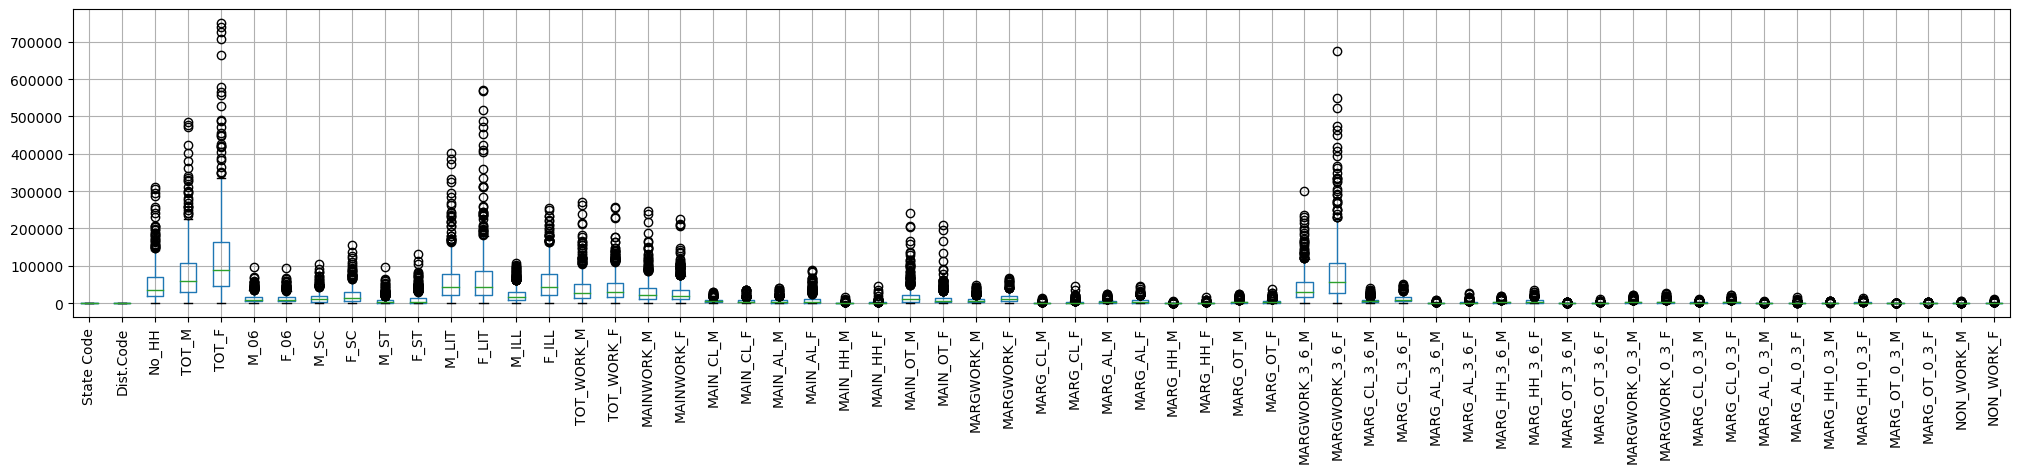

In [62]:
census_df.boxplot(figsize=(25,4))
plt.xticks(rotation=90)
plt.show()

### Scaled data

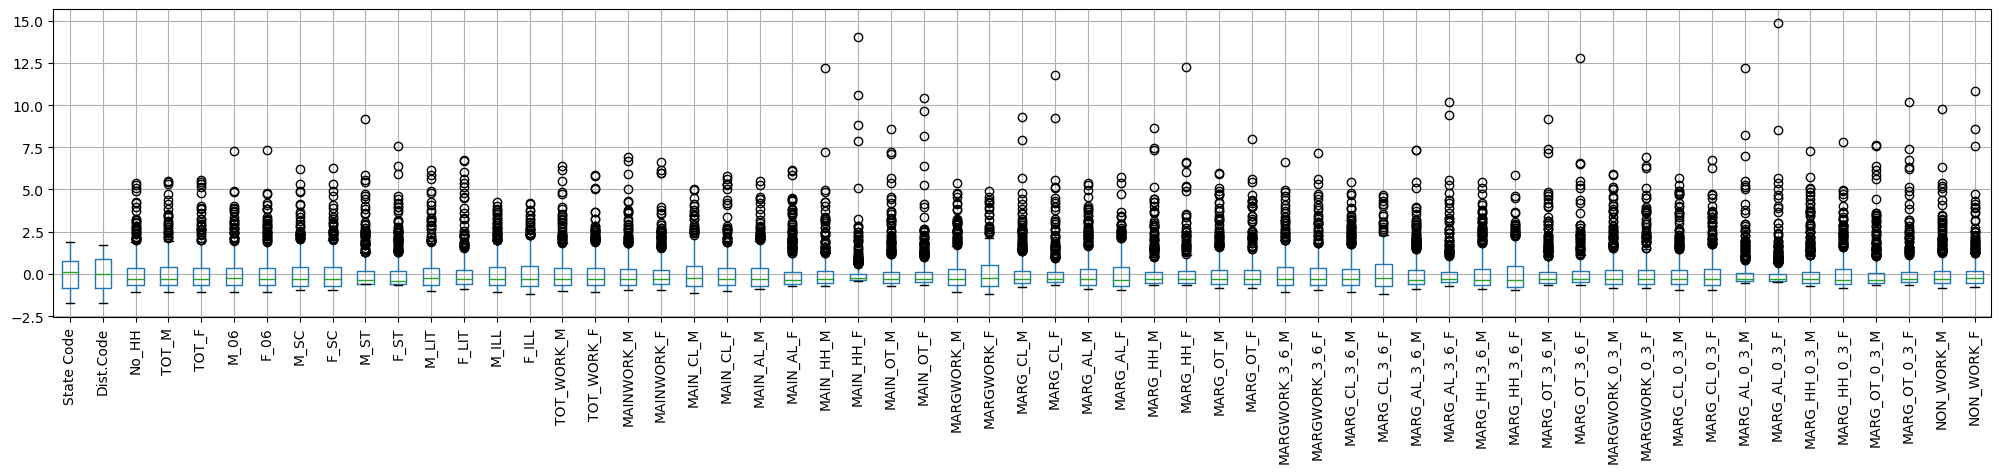

In [63]:
new_df.boxplot(figsize=(25,4))
plt.xticks(rotation=90)
plt.show()

### It can be observed that scaling has changed the outlier distribution for the variables. Earlier, the outlier distribution was varied for different variables not to mention the difference in their population ranges. Scaling has standardized both the outlier distribution along with the data ranges.

## Q5: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

## PCA

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity is done to ensure that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [64]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value

(inf, 0.0)

### Since the p-value is 0, we can reject the null hypothesis and conclude that at least one pair of variable in the data is correlated.

#### KMO Test

The Kaiser-Meyer-Olkin(KMO) measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [65]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model

0.8053442139017948

### Since the MSA value is greater than 0.7, we can proceed with carrying out PCA for our dataset.

### Creating the same number of components (n=59) as the numeric columns in the dataset.

In [66]:
pca = PCA(n_components=59, random_state=123)
df_pca = pca.fit_transform(scaled_df)
print("Covariance Matrix:\n\n{}".format(df_pca.transpose().round(2)))

Covariance Matrix:

[[-4.72 -4.87 -6.06 ... -6.18 -6.11 -5.78]
 [ 0.72  0.49  0.23 ... -1.22 -1.25 -1.5 ]
 [ 1.63  1.75  1.33 ... -0.35 -0.28 -0.19]
 ...
 [-0.    0.   -0.   ...  0.   -0.    0.  ]
 [ 0.   -0.    0.   ...  0.   -0.   -0.  ]
 [-0.   -0.   -0.   ... -0.    0.   -0.  ]]


### Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data


In [67]:
print('Eigen Vectors: \n\n %s',pca.components_.round(2))

Eigen Vectors: 

 %s [[ 0.03  0.03  0.16 ...  0.13  0.15  0.13]
 [-0.16 -0.16 -0.13 ...  0.05 -0.05 -0.07]
 [-0.25 -0.26 -0.03 ... -0.    0.13  0.09]
 ...
 [ 0.    0.   -0.   ...  0.03 -0.09  0.01]
 [ 0.   -0.   -0.   ...  0.   -0.05  0.03]
 [ 0.    0.   -0.   ... -0.05  0.05  0.04]]


In [68]:
var_exp = pca.explained_variance_ratio_
print("Eigen values: \n\n",var_exp.round(2))

Eigen values: 

 [0.54 0.14 0.08 0.07 0.04 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


## Q6: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

### Obtaining the Cumulative Sum of the Explained Variance 

In [69]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 53.93  67.79  75.47  81.98  85.82  89.14  91.47  92.97  94.19  95.22
  96.06  96.78  97.36  97.86  98.33  98.64  98.86  99.05  99.22  99.39
  99.52  99.62  99.69  99.76  99.81  99.85  99.89  99.92  99.93  99.95
  99.96  99.98  99.99  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


- <b>We can observe that <b>more than 80% of the variance is explained by 4 Principal Components.</b>
- <b>At least 90% of the variance is explained by 7 Principal Components.</b>
- <b>At least 95% of the variance is explained by 10 Principal Components.</b>

### Scree plot - identifying the number of components to be built

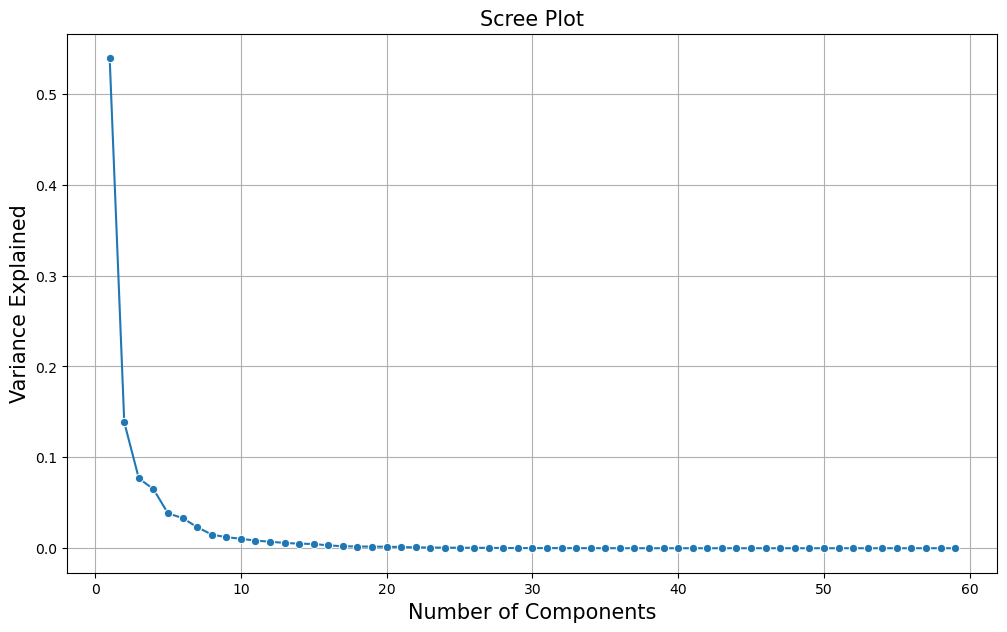

In [70]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### The number of components can be decided based upon the explained variance. It can be observed from the cumulative variance values and from the scree plot that at least 90% of the explained variance is captured by having 7 principal components.

## Q7: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

### Applying PCA for 7 PCA components to get the loadings and component output (dimensionality reduction from 59 to 7)

In [71]:
pca = PCA(n_components=7, random_state=123)
df_pca = pca.fit_transform(scaled_df)
df_pca.transpose().round(2) # Component output

array([[-4.72, -4.87, -6.06, ..., -6.18, -6.11, -5.78],
       [ 0.72,  0.49,  0.23, ..., -1.22, -1.25, -1.5 ],
       [ 1.63,  1.75,  1.33, ..., -0.35, -0.28, -0.19],
       ...,
       [ 0.09, -0.26,  0.15, ...,  0.91,  0.78,  0.85],
       [-0.61,  0.31, -0.02, ...,  0.55,  0.31,  0.25],
       [ 0.74,  0.68,  1.12, ..., -1.85, -1.91, -1.88]])

In [72]:
pd.DataFrame(df_pca)

,0,1,2,3,4,5,6
0,-4.719381,0.717504,1.632266,-1.524984,0.090256,-0.612573,0.741290
1,-4.873297,0.492001,1.752126,-1.938533,-0.262974,0.305216,0.677713
2,-6.062948,0.233751,1.333068,-0.710272,0.152170,-0.016520,1.120373
3,-6.378387,0.042766,1.404373,-1.187672,0.013921,-0.177346,0.759806
4,-4.581259,1.431602,1.722496,-0.231724,0.579573,0.058363,0.894642
...,...,...,...,...,...,...,...
635,-6.150873,-1.405780,-0.232601,-0.486829,0.748190,0.245563,-1.842006
636,-5.656448,-1.453038,-0.310560,-0.465031,0.723290,0.242882,-1.898194
637,-6.180341,-1.216266,-0.346108,-0.684361,0.907057,0.548395,-1.853190
638,-6.108741,-1.248980,-0.279497,-0.421100,0.776503,0.305538,-1.912210


In [73]:
new_df

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.792730,1.707696,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,...,-0.914299,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232
636,1.792730,1.713109,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,...,-0.831668,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993
637,1.898897,1.718521,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,...,-0.865930,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247
638,1.898897,1.723934,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,...,-0.844432,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660


In [74]:
pd.DataFrame(pca.components_.round(2)).shape

(7, 59)

In [75]:
new_df.shape

(640, 59)

### Loading of each feature on the components 

In [76]:
#Eigen Vectors when PC's are kept as 7
pca.components_.round(2)

array([[ 0.03,  0.03,  0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,
         0.03,  0.03,  0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,
         0.12,  0.1 ,  0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,
         0.16,  0.16,  0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,
         0.15,  0.16,  0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,
         0.14,  0.12,  0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,
         0.12,  0.14,  0.13,  0.15,  0.13],
       [-0.16, -0.16, -0.13, -0.08, -0.1 , -0.01, -0.01, -0.04, -0.05,
         0.01,  0.01, -0.11, -0.15,  0.  , -0.01, -0.13, -0.1 , -0.17,
        -0.16,  0.06,  0.07, -0.05, -0.08, -0.06, -0.08, -0.2 , -0.2 ,
         0.1 ,  0.11,  0.27,  0.25,  0.16,  0.12,  0.08,  0.03, -0.08,
        -0.11, -0.03, -0.1 ,  0.08,  0.09,  0.26,  0.24,  0.15,  0.1 ,
         0.07,  0.02, -0.08, -0.12,  0.15,  0.17,  0.25,  0.24,  0.18,
         0.17,  0.09,  0.05, -0.05, -0.07],
       [-0.25, -0.26, -0.03,  0.06,  0.02,  0.07,  0.06,  0.

### Checking the explained variance for each PC. Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs). It gives the Eigen Values when PC's are kept at 7

In [77]:
pca.explained_variance_ratio_.round(2)

array([0.54, 0.14, 0.08, 0.07, 0.04, 0.03, 0.02])

### Creating a dataframe of component loading against each field and identifying the pattern

In [78]:
#Component loading when PC's are kept as 7
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(scaled_df))
df_pca_loading.shape

(7, 59)

In [79]:
df_pca_loading.head()

,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
,-1.710782,-1.702283,-0.725145,-0.745298,-0.748345,-0.535515,-0.587438,-0.779249,-0.772809,0.161959,...,0.278814,0.279534,2.265234,1.626031,-0.435299,-0.654887,-0.485837,-0.419201,-0.372077,0.143180
,-1.710782,-1.696871,-0.804878,-0.779351,-0.809440,-0.729304,-0.772463,-0.587158,-0.638960,-0.525376,...,-0.598554,-0.788076,-0.200646,-0.246334,-0.561286,-0.740738,-0.560039,-0.587215,-0.511393,-0.622077
,-1.710782,-1.691458,-0.869247,-0.777073,-0.809281,-0.701632,-0.693028,-0.958783,-0.957049,-0.529717,...,-0.365440,-0.674317,-0.182985,-0.212307,-0.230570,-0.649205,-0.198303,-0.344887,-0.432721,-0.557207
,-1.710782,-1.686045,-0.985677,-0.949465,-0.963018,-0.927878,-0.898021,-0.958783,-0.957049,-0.448545,...,-0.589821,-0.666063,-0.315441,-0.249021,-0.449735,-0.668774,-0.207578,-0.183336,-0.606455,-0.507729
,-1.710782,-1.680633,-0.751134,-0.558137,-0.617504,-0.525595,-0.551211,-0.958020,-0.956910,-0.604932,...,-0.728883,-0.834369,-0.531785,-0.473776,-0.688586,-0.802601,-0.513663,-0.215646,-0.432721,-0.503331
,-1.710782,-1.675220,-1.005137,-0.991455,-0.990954,-0.949632,-0.939373,-0.958783,-0.957049,-0.480045,...,-0.717462,-0.807096,-0.465557,-0.395873,-0.553412,-0.707912,-0.495112,-0.335194,-0.626123,-0.639670
